<a href="https://colab.research.google.com/github/FawazRowayda/python-task/blob/main/Analyse_of_Ecomm_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
uploaded = files.upload()

uploaded_filenames = list (uploaded.keys())

Saving ecomm_data.csv to ecomm_data.csv


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print ( uploaded_filenames)

['ecomm_data.csv']


In [ ]:
filename = uploaded_filenames[0]
df = pd.read_csv(filename)
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB
None


In [ ]:
df.fillna(df.median(), inplace= True)
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


<ipython-input-6-8250f28a9ae5>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.median(), inplace= True)


In [ ]:
from re import S
import seaborn as sns
sns.histplot(df['Yearly Amount Spent'],bins=30,kde= True)
plt.title ('Distribution of Yearly amount Spent')
plt.xlabel ('Yearly Amount spent')
plt.ylabel('Frequency')
plt.show()


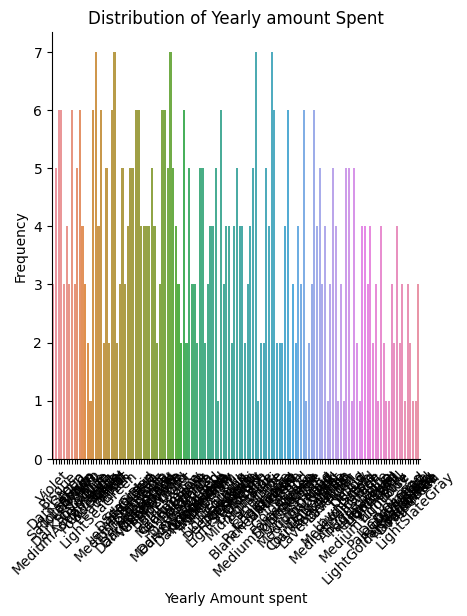

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(x='Avatar', data=df, kind='count')
plt.title('Distribution of Yearly amount Spent')
plt.xlabel('Yearly Amount spent')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()



In [ ]:
df.shape

(500, 8)

In [ ]:
df.columns[2]

'Avatar'

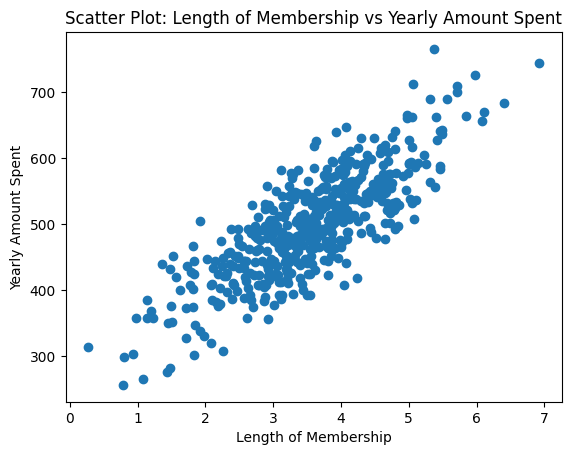

In [ ]:
import matplotlib.pyplot as plt

# columns 'Length of Membership' and 'Yearly Amount Spent'
x = df['Length of Membership']
y = df['Yearly Amount Spent']

plt.scatter(x, y)
plt.xlabel('Length of Membership')
plt.ylabel('Yearly Amount Spent')
plt.title('Scatter Plot: Length of Membership vs Yearly Amount Spent')
plt.show()


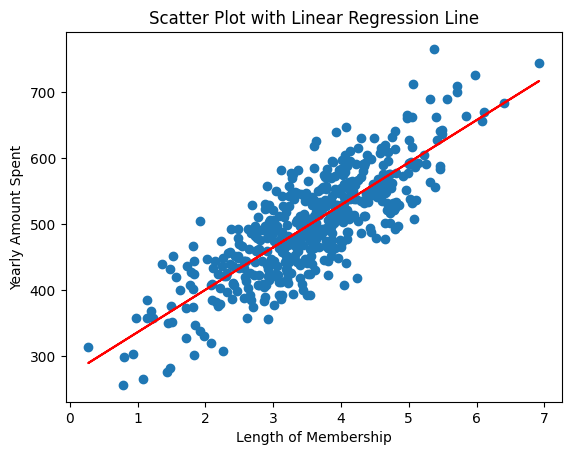

In [ ]:
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

#  columns 'Length of Membership' and 'Yearly Amount Spent'
x = df['Length of Membership']
y = df['Yearly Amount Spent']

slope, intercept, r, p, std_err = stats.linregress(x, y)

# Create a linear regression model using NumPy
mymodel = np.poly1d([slope, intercept])

# Generate predicted y values
predicted_y = mymodel(x)

plt.scatter(x, y)
plt.plot(x, predicted_y, color='red')  # Plot the linear regression line
plt.xlabel('Length of Membership')
plt.ylabel('Yearly Amount Spent')
plt.title('Scatter Plot with Linear Regression Line')
plt.show()


Mean Squared Error (Training): 2131.0602835833397
Mean Squared Error (Testing): 2279.905070110927


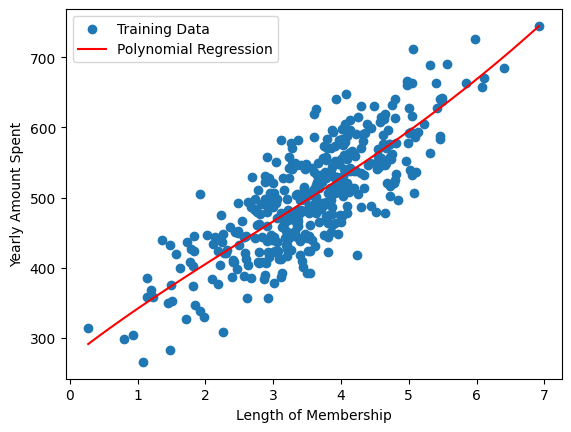

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming df is your DataFrame with columns 'Length of Membership' and 'Yearly Amount Spent'
x = df['Length of Membership'].values.reshape(-1, 1)
y = df['Yearly Amount Spent'].values

# Split data into training and testing sets
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=2)

# Fit a polynomial regression model to the training data
poly_features = PolynomialFeatures(degree=4)
train_x_poly = poly_features.fit_transform(train_x)
model = LinearRegression()
model.fit(train_x_poly, train_y)

# Make predictions on the training set
train_y_pred = model.predict(train_x_poly)

# Evaluate the model on the training set
mse_train = mean_squared_error(train_y, train_y_pred)
print(f'Mean Squared Error (Training): {mse_train}')

# Make predictions on the testing set
test_x_poly = poly_features.transform(test_x)
test_y_pred = model.predict(test_x_poly)

# Evaluate the model on the testing set
mse_test = mean_squared_error(test_y, test_y_pred)
print(f'Mean Squared Error (Testing): {mse_test}')

# Plot the training data and the polynomial regression line
myline = np.linspace(min(x), max(x), 100).reshape(-1, 1)
myline_poly = poly_features.transform(myline)
plt.scatter(train_x, train_y, label='Training Data')
plt.plot(myline, model.predict(myline_poly), label='Polynomial Regression', color='red')
plt.xlabel('Length of Membership')
plt.ylabel('Yearly Amount Spent')
plt.legend()
plt.show()


In [ ]:
print("""
# The Mean Squared Error (MSE) serves as a metric for the average squared disparity between predicted and actual values.
# Generally, lower MSE values indicate superior model performance.
# In this instance, the training MSE is less than the testing MSE, a common occurrence.
# Nevertheless, ensuring that the model generalizes effectively to unfamiliar data (testing set) is crucial.

Considerations:

Overfitting:

If the training MSE is significantly lower than the testing MSE,
it may imply overfitting to the training data.
Overfitting arises when the model captures noise in the training data,
diminishing its effectiveness on novel, unseen data.
""")



# The Mean Squared Error (MSE) serves as a metric for the average squared disparity between predicted and actual values.
# Generally, lower MSE values indicate superior model performance.
# In this instance, the training MSE is less than the testing MSE, a common occurrence.
# Nevertheless, ensuring that the model generalizes effectively to unfamiliar data (testing set) is crucial.

Considerations:

Overfitting:

If the training MSE is significantly lower than the testing MSE,
it may imply overfitting to the training data.
Overfitting arises when the model captures noise in the training data,
diminishing its effectiveness on novel, unseen data.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB
None
Mean Squared Error (Training): 2131.0602835833397
R-squared (Training): 0.6533295111781544
Mean Squared Error (Testing): 2279.905070110927
R-squared (Testing): 0.6591348883934525


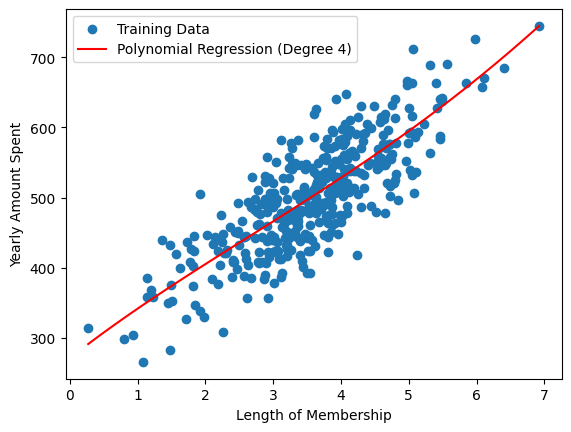

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd


filename = 'ecomm_data.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv('ecomm_data.csv')

# Display information about the DataFrame
print(df.info())

# Assuming 'Length of Membership' and 'Yearly Amount Spent' are columns in your DataFrame
x = df['Length of Membership'].values.reshape(-1, 1)
y = df['Yearly Amount Spent'].values

# Split data into training and testing sets
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=2)

# Fit a polynomial regression model to the training data
poly_features = PolynomialFeatures(degree=4)
train_x_poly = poly_features.fit_transform(train_x)
model = LinearRegression()
model.fit(train_x_poly, train_y)

# Make predictions on the training set
train_y_pred = model.predict(train_x_poly)

# Evaluate the model on the training set
mse_train = mean_squared_error(train_y, train_y_pred)
r2_train = r2_score(train_y, train_y_pred)
print(f'Mean Squared Error (Training): {mse_train}')
print(f'R-squared (Training): {r2_train}')

# Make predictions on the testing set
test_x_poly = poly_features.transform(test_x)
test_y_pred = model.predict(test_x_poly)

# Evaluate the model on the testing set
mse_test = mean_squared_error(test_y, test_y_pred)
r2_test = r2_score(test_y, test_y_pred)
print(f'Mean Squared Error (Testing): {mse_test}')
print(f'R-squared (Testing): {r2_test}')

# Plot the training data and the polynomial regression line
myline = np.linspace(min(x), max(x), 100).reshape(-1, 1)
myline_poly = poly_features.transform(myline)
plt.scatter(train_x, train_y, label='Training Data')
plt.plot(myline, model.predict(myline_poly), label=f'Polynomial Regression (Degree {poly_features.degree})', color='red')
plt.xlabel('Length of Membership')
plt.ylabel('Yearly Amount Spent')
plt.legend()
plt.show()


In [13]:
print('The result 0.65 shows that the model fits the testing set as well,and we are confident that we can use the model to predict future values.')

The result 0.65 shows that the model fits the testing set as well,and we are confident that we can use the model to predict future values.
